# Reading and Cleaning Data


In [1]:
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Bert Practice/Depression Labeled Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [4]:
df.columns

Index(['Unnamed: 0', 'message', 'label'], dtype='object')

In [5]:
df.drop('Unnamed: 0',axis = 1,inplace=True)
df.head(5)

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [6]:
import string
import re
def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
#     stops = set(stopwords.words("english"))
#     text = [w for w in text if not w in stops]
    
    text = " ".join(text)
    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
#     text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text
df['message'] = df['message'].apply(clean_text)
df.head()

,message,label
0,just had a real good moment i missssssssss him...,0
1,is reading manga http : plurk com p mzp1e,0
2,comeagainjen http : twitpic com 2y2lx - http ...,0
3,lapcat need to send em to my accountant tomor...,0
4,add me on myspace ! ! ! myspace com lookthunder,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10314 non-null  object
 1   label    10314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.3+ KB


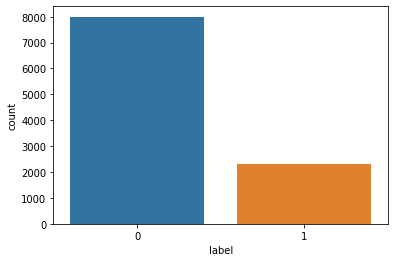

In [8]:
sns.countplot(df['label'])

In [9]:
df['label'].value_counts()

0    8000
1    2314
Name: label, dtype: int64

# Train, Test, Validation Split 

In [0]:
from sklearn.model_selection import train_test_split

# Just Specify test and validation size here. Train will automatically adjusted 
test_size_we_want = 0.15
val_size_we_want = 0.10

test_size = test_size_we_want
val_size =  val_size_we_want/(1-test_size)

X_train, X_test, y_train, y_test = train_test_split(df.index.values, 
                                                  df.label.values, 
                                                  test_size=test_size, 
                                                  random_state=17, 
                                                  stratify=df.label.values)

X_train, X_val, y_train, y_val  = train_test_split( X_train, 
                                                    y_train,
                                                  test_size= val_size,    
                                                  random_state=17,   
                                                  stratify=y_train)    

In [0]:
train_df = df.iloc[X_train,:]
test_df = df.iloc[X_test,:]
validation_df = df.iloc[X_val,:] 

In [12]:
# Checking
len(df),len(X_train)/len(df),len(X_test)/len(df),len(X_val)/len(df)
print(f'Total Data: {len(df)} -> 100%')
print(f'Total Train Data: {len(train_df)} -> {(len(train_df)/len(df))*100}%')
print(f'Total Test Data: {len(test_df)} -> {(len(test_df)/len(df))*100}%')
print(f'Total Validation Data: {len(validation_df)} -> {(len(validation_df)/len(df))*100}%')

Total Data: 10314 -> 100%
Total Train Data: 7734 -> 74.98545666084932%
Total Test Data: 1548 -> 15.008726003490402%
Total Validation Data: 1032 -> 10.005817335660268%


In [13]:
train_df

,message,label
846,chocolatebox279 haha i went red with mine and...,0
9882,icymi : researchers have linked a sense of pur...,1
9296,study shows hrv testing can differentiate betw...,1
1986,tristywisty thanks ! the photo on daylerobyn ...,0
4989,antq twit aw thankyou x,0
...,...,...
9798,bts saved me from committing suicide i hv neve...,1
3595,i m gonna go out in the sun for a bit before i...,0
10173,what is y all trying to pull she an innocent ...,1
6250,iampattic i do not even know how that could h...,0


In [14]:
test_df

,message,label
3418,sitting down having a glass of strega on the b...,0
8879,tasofficial i really miss xyz since 2016 i ha...,1
4281,betsysharp oh but i have an autographed chris...,0
948,on her way to pick up patti,0
5510,with her best mate very happy time to start ma...,0
...,...,...
6221,zachzachh get 100 followers a day using www t...,0
7204,ericaleigh receive a hug from twitter,0
6203,chillin with ellie p six flags monday ! ! ! cl...,0
8373,nealbrennan i recently saw your netflix speci...,1


In [15]:
validation_df

,message,label
6418,kiairaest1989 lol craziness ! hopefully i mak...,0
3814,just napped so hard that he slept on top of hi...,0
7190,autograph hunting new items from lenny henry a...,0
10115,rt : bipolarhotline : national suicide hotline...,1
10263,yesterday i struggled really badly with my dep...,1
...,...,...
6579,m amp;d in the rain should be fun,0
7786,i love the rain it lets me feel euphoria and f...,0
2050,is going to see a day to remember twice this year,0
3000,teamcyrus i love you ! i dont think i have ev...,0


# Exploratory Data Analysis

In [0]:
def write_count(ax,total):
  ax.set(ylim=(0, total+500))
  for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 20,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha="center", fontsize = 10)
            


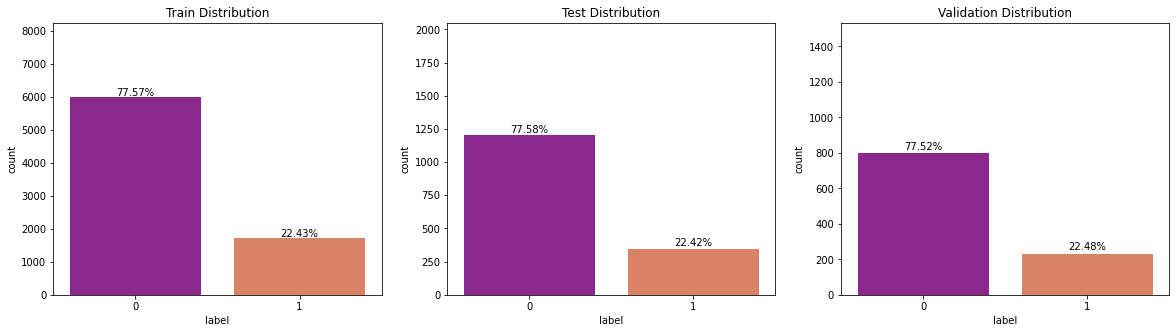

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots( 1, 3, figsize=(20, 5))
axes = axes.flatten()

sns.countplot(train_df['label'], palette='plasma', ax=axes[0]).set_title('Train Distribution')
write_count(axes[0],  float(len( train_df['label'] )))

sns.countplot(test_df['label'], palette='plasma', ax=axes[1]).set_title('Test Distribution')
write_count(axes[1],  float(len( test_df['label'] )))

sns.countplot(validation_df['label'], palette='plasma', ax=axes[2]).set_title('Validation Distribution')
write_count(axes[2],  float(len( validation_df['label'] )))


# Setting Up Bert


In [18]:
!pip install transformers

     |████████████████████████████████| 665kB 3.4MB/s 
     |████████████████████████████████| 3.8MB 8.7MB/s 
     |████████████████████████████████| 1.1MB 33.1MB/s 
     |████████████████████████████████| 890kB 38.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=9a157c7c78129be5f63e04ffb5b6012312bb7461f86226509a892d047a106174
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


# Bert Model and Its Variation'S Return Info

Hugginface'S Bert and Bert'S variation Returns
1.   **Last layer hidden state : bert_output[0]  (Embedding)**
2.   **Pooler_output (torch.FloatTensor: of shape (batch_size, hidden_size)): bert_output[0][1]**  <br> Last layer hidden-state of the first token of the sequence (classification token) further processed by a Linear layer and a Tanh activation function. The Linear layer weights are trained from the next sentence prediction (classification) objective during pre-training.**This output is usually not a good summary of the semantic content of the input, you’re often better with averaging or pooling the sequence of hidden-states for the whole input sequence.**

3. **Hidden_states (tuple(torch.FloatTensor), optional, returned when config.output_hidden_states=True): bert_output[2] (tuple)**<br>Tuple of torch.FloatTensor (one for the output of the embeddings + one for the output of each layer) of shape (batch_size, sequence_length, hidden_size).Hidden-states of the model at the output of each layer plus the initial embedding outputs





# Configuration

In [0]:
MAX_SEQ_LENGTH = 256

# Add Some Custor Metrics to Monitor Model Performence

In [0]:
from tensorflow.keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Bert Model

In [20]:
from transformers import TFBertModel,BertTokenizer

bert_tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
bert_model = TFBertModel.from_pretrained("bert-base-cased",output_hidden_states = True)

## Preprocessing Text (Tokenization+Padding)



In [88]:
import numpy as np

encoded_train_data = bert_tokenizer.batch_encode_plus(
    train_df['message'].values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=MAX_SEQ_LENGTH,
)

encoded_test_data = bert_tokenizer.batch_encode_plus(
    test_df['message'].values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=MAX_SEQ_LENGTH,
)

encoded_validation_data = bert_tokenizer.batch_encode_plus(
    validation_df['message'].values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=MAX_SEQ_LENGTH,
)

train_input_ids = np.array(encoded_train_data['input_ids']).reshape(-1,MAX_SEQ_LENGTH)
train_attention_mask = np.array(encoded_train_data['attention_mask']).reshape(-1,MAX_SEQ_LENGTH)

test_input_ids = np.array(encoded_test_data['input_ids']).reshape(-1,MAX_SEQ_LENGTH)
test_attention_mask = np.array(encoded_test_data['attention_mask']).reshape(-1,MAX_SEQ_LENGTH)

validation_input_ids = np.array(encoded_validation_data['input_ids']).reshape(-1,MAX_SEQ_LENGTH)
validation_attention_mask = np.array(encoded_validation_data['attention_mask']).reshape(-1,MAX_SEQ_LENGTH)


# Printing Info
print(f"Shape of 'train_input_ids' : {train_input_ids.shape} --> Shape of 'train_attention_mask' : {train_attention_mask.shape}")
print(f"Shape of 'test_input_ids' : {test_input_ids.shape} --> Shape of 'test_attention_mask' : {test_attention_mask.shape}")
print(f"Shape of 'validation_input_ids' : {validation_input_ids.shape} --> Shape of 'validation_attention_mask' : {validation_attention_mask.shape}")


Shape of 'train_input_ids' : (7734, 256) --> Shape of 'train_attention_mask' : (7734, 256)
Shape of 'test_input_ids' : (1548, 256) --> Shape of 'test_attention_mask' : (1548, 256)
Shape of 'validation_input_ids' : (1032, 256) --> Shape of 'validation_attention_mask' : (1032, 256)


## Creating Bert Model

In [24]:
from tensorflow.keras.layers import LSTM,Dense,Input,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


token_inputs = Input((MAX_SEQ_LENGTH), dtype='int32', name='input_word_ids')
mask_inputs = Input((MAX_SEQ_LENGTH,), dtype='int32', name='input_masks')

bert_input = [token_inputs,mask_inputs]
bert_output = bert_model(bert_input)
lstm_output = LSTM(128)(bert_output[0])
dropout_output = Dropout(0.2)(lstm_output)
final_output = Dense(1,activation = 'sigmoid')(dropout_output)

my_bert_model = Model(bert_input,final_output)

adam = Adam(lr = 2e-5,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0,amsgrad=False)
my_bert_model.compile(loss='binary_crossentropy', optimizer = adam, metrics = ['acc',f1_m])

my_bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 256)]        0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 256)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     ((None, 256, 768), ( 108310272   input_word_ids[0][0]             
                                                                 input_masks[0][0]                
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 128)          459264      tf_bert_model[0][0]          

In [26]:
my_bert_model.fit( [train_input_ids, train_attention_mask], train_df['label'].values, 
          validation_data=( [ validation_input_ids, validation_attention_mask] ,validation_df['label'].values),
          batch_size=8 ,epochs= 2)

Epoch 1/2
967/967 [==============================] - 929s 961ms/step - loss: 0.0301 - acc: 0.9908 - f1_m: 0.8370 - val_loss: 4.6544e-04 - val_acc: 1.0000 - val_f1_m: 0.8760
Epoch 2/2
967/967 [==============================] - 924s 956ms/step - loss: 6.7352e-04 - acc: 0.9997 - f1_m: 0.8690 - val_loss: 8.4913e-05 - val_acc: 1.0000 - val_f1_m: 0.8760


## Evaluating Bert Model




In [89]:
loss, acc, f1 = my_bert_model.evaluate( [ test_input_ids, test_attention_mask ], y_test, verbose = 1)
print(f'Accuracy : {acc}')
print(f'F1 Score : {f1}')

49/49 [==============================] - 51s 1s/step - loss: 2.9644e-04 - acc: 1.0000 - f1_m: 1.0000
Accuracy : 1.0
F1 Score : 1.0


In [28]:
prediction = my_bert_model.predict( [ test_input_ids, test_attention_mask ], verbose= 1 )
prediction = np.round(prediction)

49/49 [==============================] - 51s 1s/step


In [31]:
from sklearn.metrics import confusion_matrix,classification_report

# Detailed classification report
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[1201    0]
 [   0  347]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1201
           1       1.00      1.00      1.00       347

    accuracy                           1.00      1548
   macro avg       1.00      1.00      1.00      1548
weighted avg       1.00      1.00      1.00      1548



## Get Prediction of Bert Model for Real Example

In [54]:
sentences = ['I am so depressed','I am so happy']
sentences = list(map(clean_text,sentences))

encoded_sentence = bert_tokenizer.batch_encode_plus(
    sentences, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=MAX_SEQ_LENGTH,
)

input_ids = np.array(encoded_sentence['input_ids']).reshape(-1,MAX_SEQ_LENGTH)
attention_mask = np.array(encoded_sentence['attention_mask']).reshape(-1,MAX_SEQ_LENGTH)


prediction = np.round(my_bert_model.predict( [ input_ids, attention_mask ], verbose= 1 ))
print(f'{sentences[0]} : {prediction[0][0]}')
print(f'{sentences[1]} : {prediction[1][0]}')


1/1 [==============================] - 0s 2ms/step
i am so depressed : 1.0
i am so happy : 0.0


# Roberta Model


In [42]:
from transformers import TFRobertaModel,RobertaTokenizer

roberta_model = TFRobertaModel.from_pretrained("roberta-base",output_hidden_states = True)
roberta_tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

## Preprocessing Text (Tokenization+Padding)

In [86]:
import numpy as np

encoded_train_data = roberta_tokenizer.batch_encode_plus(
    train_df['message'].values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=MAX_SEQ_LENGTH,
)

encoded_test_data = roberta_tokenizer.batch_encode_plus(
    test_df['message'].values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=MAX_SEQ_LENGTH,
)

encoded_validation_data = roberta_tokenizer.batch_encode_plus(
    validation_df['message'].values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=MAX_SEQ_LENGTH,
)

train_input_ids = np.array(encoded_train_data['input_ids']).reshape(-1,MAX_SEQ_LENGTH)
train_attention_mask = np.array(encoded_train_data['attention_mask']).reshape(-1,MAX_SEQ_LENGTH)

test_input_ids = np.array(encoded_test_data['input_ids']).reshape(-1,MAX_SEQ_LENGTH)
test_attention_mask = np.array(encoded_test_data['attention_mask']).reshape(-1,MAX_SEQ_LENGTH)

validation_input_ids = np.array(encoded_validation_data['input_ids']).reshape(-1,MAX_SEQ_LENGTH)
validation_attention_mask = np.array(encoded_validation_data['attention_mask']).reshape(-1,MAX_SEQ_LENGTH)


# Printing Info
print(f"Shape of 'train_input_ids' : {train_input_ids.shape} --> Shape of 'train_attention_mask' : {train_attention_mask.shape}")
print(f"Shape of 'test_input_ids' : {test_input_ids.shape} --> Shape of 'test_attention_mask' : {test_attention_mask.shape}")
print(f"Shape of 'validation_input_ids' : {validation_input_ids.shape} --> Shape of 'validation_attention_mask' : {validation_attention_mask.shape}")


Shape of 'train_input_ids' : (7734, 256) --> Shape of 'train_attention_mask' : (7734, 256)
Shape of 'test_input_ids' : (1548, 256) --> Shape of 'test_attention_mask' : (1548, 256)
Shape of 'validation_input_ids' : (1032, 256) --> Shape of 'validation_attention_mask' : (1032, 256)


## Creating Roberta Model

In [44]:
token_inputs = Input((MAX_SEQ_LENGTH), dtype='int32', name='input_word_ids')
mask_inputs = Input((MAX_SEQ_LENGTH,), dtype='int32', name='input_masks')

roberta_input = [token_inputs,mask_inputs]
roberta_output = roberta_model(roberta_input)
lstm_output = LSTM(128)(roberta_output[0])
dropout_output = Dropout(0.2)(lstm_output)
final_output = Dense(1,activation = 'sigmoid')(dropout_output)

my_roberta_model = Model(roberta_input,final_output)

adam = Adam(lr = 2e-5,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0,amsgrad=False)
my_roberta_model.compile(loss='binary_crossentropy', optimizer = adam, metrics = ['acc',f1_m])

my_roberta_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 256)]        0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 256)]        0                                            
__________________________________________________________________________________________________
tf_roberta_model (TFRobertaMode ((None, 256, 768), ( 124645632   input_word_ids[0][0]             
                                                                 input_masks[0][0]                
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 128)          459264      tf_roberta_model[0][0]     

In [45]:
my_roberta_model.fit( [train_input_ids, train_attention_mask], train_df['label'].values, 
          validation_data=( [ validation_input_ids, validation_attention_mask] ,validation_df['label'].values),
          batch_size=8 ,epochs= 1)

967/967 [==============================] - 940s 972ms/step - loss: 0.0311 - acc: 0.9890 - f1_m: 0.8359 - val_loss: 0.0014 - val_acc: 1.0000 - val_f1_m: 0.8760


## Evaluating Roberta Model

In [87]:
loss, acc, f1 = my_roberta_model.evaluate( [ test_input_ids, test_attention_mask ], y_test, verbose = 1)
print(f'Accuracy : {acc}')
print(f'F1 Score : {f1}')

49/49 [==============================] - 51s 1s/step - loss: 0.0019 - acc: 0.9994 - f1_m: 0.9984
Accuracy : 0.9993540048599243
F1 Score : 0.9984301328659058


In [46]:
prediction = my_roberta_model.predict( [ test_input_ids, test_attention_mask ], verbose= 1 )
prediction = np.round(prediction)

49/49 [==============================] - 51s 1s/step


In [47]:
from sklearn.metrics import confusion_matrix,classification_report

# Detailed classification report
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[1201    0]
 [   1  346]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1201
           1       1.00      1.00      1.00       347

    accuracy                           1.00      1548
   macro avg       1.00      1.00      1.00      1548
weighted avg       1.00      1.00      1.00      1548



## Get Prediction of RoBerta Model for Real Example


In [60]:
sentences = ['I am so depressed','I am not so happy. I am depressed']
sentences = list(map(clean_text,sentences))
encoded_sentence = roberta_tokenizer.batch_encode_plus(
    sentences, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=MAX_SEQ_LENGTH,
)

input_ids = np.array(encoded_sentence['input_ids']).reshape(-1,MAX_SEQ_LENGTH)
attention_mask = np.array(encoded_sentence['attention_mask']).reshape(-1,MAX_SEQ_LENGTH)


prediction = np.round(my_roberta_model.predict( [ input_ids, attention_mask ], verbose= 1 ))
print(f'{sentences[0]} : {prediction[0][0]}')
print(f'{sentences[1]} : {prediction[1][0]}')


1/1 [==============================] - 0s 2ms/step
i am so depressed : 1.0
i am not so happy i am depressed : 1.0


# Albert Model

In [61]:
from transformers import TFAlbertModel, AlbertTokenizer

albert_model = TFAlbertModel.from_pretrained("albert-base-v1")
albert_tokenizer = AlbertTokenizer.from_pretrained("albert-base-v1",output_hidden_states = True)

## Preprocessing Text (Tokenization+Padding)

In [62]:
import numpy as np

encoded_train_data = albert_tokenizer.batch_encode_plus(
    train_df['message'].values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=MAX_SEQ_LENGTH,
)

encoded_test_data = albert_tokenizer.batch_encode_plus(
    test_df['message'].values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=MAX_SEQ_LENGTH,
)

encoded_validation_data = albert_tokenizer.batch_encode_plus(
    validation_df['message'].values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=MAX_SEQ_LENGTH,
)

train_input_ids = np.array(encoded_train_data['input_ids']).reshape(-1,MAX_SEQ_LENGTH)
train_attention_mask = np.array(encoded_train_data['attention_mask']).reshape(-1,MAX_SEQ_LENGTH)

test_input_ids = np.array(encoded_test_data['input_ids']).reshape(-1,MAX_SEQ_LENGTH)
test_attention_mask = np.array(encoded_test_data['attention_mask']).reshape(-1,MAX_SEQ_LENGTH)

validation_input_ids = np.array(encoded_validation_data['input_ids']).reshape(-1,MAX_SEQ_LENGTH)
validation_attention_mask = np.array(encoded_validation_data['attention_mask']).reshape(-1,MAX_SEQ_LENGTH)


# Printing Info
print(f"Shape of 'train_input_ids' : {train_input_ids.shape} --> Shape of 'train_attention_mask' : {train_attention_mask.shape}")
print(f"Shape of 'test_input_ids' : {test_input_ids.shape} --> Shape of 'test_attention_mask' : {test_attention_mask.shape}")
print(f"Shape of 'validation_input_ids' : {validation_input_ids.shape} --> Shape of 'validation_attention_mask' : {validation_attention_mask.shape}")


Shape of 'train_input_ids' : (7734, 256) --> Shape of 'train_attention_mask' : (7734, 256)
Shape of 'test_input_ids' : (1548, 256) --> Shape of 'test_attention_mask' : (1548, 256)
Shape of 'validation_input_ids' : (1032, 256) --> Shape of 'validation_attention_mask' : (1032, 256)


## Creating Albert Model

In [64]:
token_inputs = Input((MAX_SEQ_LENGTH), dtype='int32', name='input_word_ids')
mask_inputs = Input((MAX_SEQ_LENGTH,), dtype='int32', name='input_masks')

albert_input = [token_inputs,mask_inputs]
albert_output = albert_model(albert_input)
lstm_output = LSTM(128)(albert_output[0])
dropout_output = Dropout(0.2)(lstm_output)
final_output = Dense(1,activation = 'sigmoid')(dropout_output)

my_albert_model = Model(albert_input,final_output)

adam = Adam(lr = 2e-5,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0,amsgrad=False)
my_albert_model.compile(loss='binary_crossentropy', optimizer = adam, metrics = ['acc',f1_m])

my_albert_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 256)]        0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 256)]        0                                            
__________________________________________________________________________________________________
tf_albert_model (TFAlbertModel) ((None, 256, 768), ( 11683584    input_word_ids[0][0]             
                                                                 input_masks[0][0]                
__________________________________________________________________________________________________
lstm_3 (LSTM)                   (None, 128)          459264      tf_albert_model[1][0]      

In [65]:
my_albert_model.fit( [train_input_ids, train_attention_mask], train_df['label'].values, 
          validation_data=( [ validation_input_ids, validation_attention_mask] ,validation_df['label'].values),
          batch_size=8 ,epochs= 1)

967/967 [==============================] - 906s 936ms/step - loss: 0.0358 - acc: 0.9872 - f1_m: 0.8305 - val_loss: 0.0052 - val_acc: 0.9990 - val_f1_m: 0.8682


## Evaluating Albert Model

In [85]:
loss, acc, f1 = my_albert_model.evaluate( [ test_input_ids, test_attention_mask ], y_test, verbose = 1)
print(f'Accuracy : {acc}')
print(f'F1 Score : {f1}')

49/49 [==============================] - 52s 1s/step - loss: 0.0074 - acc: 0.9987 - f1_m: 0.9966
Accuracy : 0.9987080097198486
F1 Score : 0.996574878692627


In [66]:
prediction = my_albert_model.predict( [ test_input_ids, test_attention_mask ], verbose= 1 )
prediction = np.round(prediction)

49/49 [==============================] - 51s 1s/step


In [67]:
from sklearn.metrics import confusion_matrix,classification_report

# detailed classification report
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[1201    0]
 [   2  345]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1201
           1       1.00      0.99      1.00       347

    accuracy                           1.00      1548
   macro avg       1.00      1.00      1.00      1548
weighted avg       1.00      1.00      1.00      1548



## Get Prediction of AlBert Model for Real Example


In [82]:
sentences = ['Life is full of anxiety','Depression is really ruining me right now']
encoded_sentence = albert_tokenizer.batch_encode_plus(
    sentences, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=MAX_SEQ_LENGTH,
)

input_ids = np.array(encoded_sentence['input_ids']).reshape(-1,MAX_SEQ_LENGTH)
attention_mask = np.array(encoded_sentence['attention_mask']).reshape(-1,MAX_SEQ_LENGTH)


prediction = np.round(my_albert_model.predict( [ input_ids, attention_mask ], verbose= 1 ))
print(f'{sentences[0]} : {prediction[0][0]}')
print(f'{sentences[1]} : {prediction[1][0]}')


1/1 [==============================] - 0s 2ms/step
Life is full of anxiety : 1.0
Depression is really ruining me right now : 1.0


# Normal Embedding Model

## Preprocessing Text (Tokenization+Padding)

In [101]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding


tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['message'].values)
vocabularySize = len(tokenizer.word_index)+1


train_Token = tokenizer.texts_to_sequences(train_df['message'])
train_padded = pad_sequences(train_Token,maxlen=MAX_SEQ_LENGTH,padding="post")

test_Token = tokenizer.texts_to_sequences(test_df['message'])
test_padded = pad_sequences(test_Token,maxlen=MAX_SEQ_LENGTH,padding="post")

validation_Token = tokenizer.texts_to_sequences(validation_df['message'])
validation_padded = pad_sequences(validation_Token,maxlen=MAX_SEQ_LENGTH,padding="post")

# Printing Info
print(f"Shape of 'train_padded' : {train_padded.shape} ")
print(f"Shape of 'test_padded' : {test_padded.shape} ")
print(f"Shape of 'validation_padded' : {validation_padded.shape} ")


Shape of 'train_padded' : (7734, 256) 
Shape of 'test_padded' : (1548, 256) 
Shape of 'validation_padded' : (1032, 256) 


## Creating Normal Embedding Model

In [104]:
padded_inputs = Input((MAX_SEQ_LENGTH), dtype='int32', name='padded_input')
embedding_output = Embedding(input_dim= vocabularySize, output_dim= 768, mask_zero=True  , input_length=MAX_SEQ_LENGTH)(padded_inputs)
lstm_output = LSTM(128)(embedding_output)
dropout_output = Dropout(0.2)(lstm_output)
final_output = Dense(1,activation = 'sigmoid')(dropout_output)
normal_model = Model(padded_inputs,final_output)

normal_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc',f1_m])
normal_model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
padded_input (InputLayer)    [(None, 256)]             0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 256, 768)          14075136  
_________________________________________________________________
lstm_10 (LSTM)               (None, 128)               459264    
_________________________________________________________________
dropout_88 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 14,534,529
Trainable params: 14,534,529
Non-trainable params: 0
_________________________________________________________________


In [105]:
normal_model.fit( train_padded , train_df['label'].values, 
          validation_data=( validation_padded ,validation_df['label'].values),
          batch_size=32 ,epochs= 2)

Epoch 1/2
242/242 [==============================] - 40s 165ms/step - loss: 0.1074 - acc: 0.9692 - f1_m: 0.9064 - val_loss: 0.0162 - val_acc: 0.9981 - val_f1_m: 0.9640
Epoch 2/2
242/242 [==============================] - 38s 157ms/step - loss: 0.0085 - acc: 0.9988 - f1_m: 0.9974 - val_loss: 0.0398 - val_acc: 0.9942 - val_f1_m: 0.9549


## Evaluating Normal Embedding Model

In [106]:
loss, acc, f1 = normal_model.evaluate( test_padded, y_test, verbose = 1)
print(f'Accuracy : {acc}')
print(f'F1 Score : {f1}')

49/49 [==============================] - 1s 15ms/step - loss: 0.0288 - acc: 0.9948 - f1_m: 0.9869
Accuracy : 0.9948320388793945
F1 Score : 0.986860990524292


In [107]:
prediction = normal_model.predict( test_padded, verbose= 1 )
prediction = np.round(prediction)

49/49 [==============================] - 1s 14ms/step


In [108]:
from sklearn.metrics import confusion_matrix,classification_report

# Detailed classification report
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[1197    4]
 [   4  343]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1201
           1       0.99      0.99      0.99       347

    accuracy                           0.99      1548
   macro avg       0.99      0.99      0.99      1548
weighted avg       0.99      0.99      0.99      1548



## Get Prediction of Normal Embedding Model for Real Example


In [110]:
sentences = ['Life is full of anxiety','Depression is really ruining me right now']
sentences = list(map(clean_text,sentences))

token = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(token,maxlen=MAX_SEQ_LENGTH,padding="post")

prediction = np.round(normal_model.predict( padded , verbose= 1 ))
print(f'{sentences[0]} : {prediction[0][0]}')
print(f'{sentences[1]} : {prediction[1][0]}')

1/1 [==============================] - 0s 2ms/step
life is full of anxiety : 0.0
depression is really ruining me right now : 1.0
